# Cloud-radiative impact in ICON2.1 and ICON2.6 in terms of vertically-integrated eddy kinetic energy

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys; sys.path.append("../helperfuncs")
from myfunctions import domainmean, eke, corepressure, load_data_cyclonemetrics, beautify_timeseries

Loads data.

In [4]:
path = "/work/bb1135/b380459/Butz-MSc2022/consolidated/"

# ICON2.1
i21_no = xr.open_dataset(path+"/icon-lc1-i2100-0002-atmfields_ll_DOM01_ML.nc", chunks="auto").squeeze() # no radiation
i21_ch = xr.open_dataset(path+"/icon-lc1-i2100-0004-atmfields_ll_DOM01_ML.nc", chunks="auto").squeeze() # only cloud-radiative heating

# ICON2.6
path = "/work/bb1135/b380459/Butz-MSc2022/consolidated/"
i26_no = xr.open_dataset(path+"/icon-lc1-i2622-v2-0003-atmfields_ll_DOM01_ML.nc", chunks="auto").squeeze() # no radiation
i26_ch = xr.open_dataset(path+"/icon-lc1-i2622-v2-0005-atmfields_ll_DOM01_ML.nc", chunks="auto").squeeze() # only cloud-radiative heating

# reorder latitudes for ICON2.6 from NP to SP
i26_no = i26_no.reindex(lat=list(reversed(i26_no.lat)))
i26_ch = i26_ch.reindex(lat=list(reversed(i26_ch.lat)))

Defines time and height.

In [5]:
# time information in units of days
time = np.arange(0,i21_no.time.size/4,0.25)

# level height in km
z_ifc = i21_no.isel(time=0, lat=0, lon=0)["z_ifc"].values

Defines functions to compute vertically-integrated EKE.

In [6]:
def compute_eke_vertsum(ds, _z_ifc):
    """Computes vertical sum of domain-average of EKE."""
    zonmean = ds - ds.mean("lon") # zonal mean
    eke = ( 0.5*(np.power(zonmean["u"], 2) + np.power(zonmean["v"], 2)) ).mean("lon")
    eke_areamean = domainmean(eke.sel(lat=slice(75,25)))       # eke mean over horizontal domain
    rho_areamean = domainmean(ds["rho"].sel(lat=slice(75,25))) # rho mean over horizontal domain
    # vertical integral
    _dz = np.abs(np.diff(_z_ifc))
    eke_sum = (eke_areamean*rho_areamean*_dz).sum("height")
    return eke_sum

Plots time series.

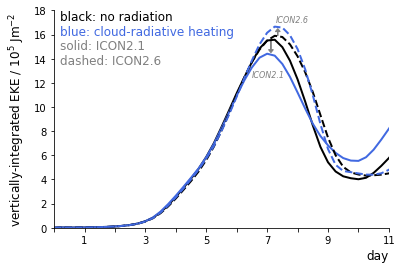

In [9]:
lw=2 # line width

plt.figure(figsize=(6,4))
ax=plt.subplot(1,1,1)

plt.plot(time, 1e-5*compute_eke_vertsum(i21_no, z_ifc), color="k", linestyle="-", label="no radiation", linewidth=lw)
plt.plot(time, 1e-5*compute_eke_vertsum(i21_ch, z_ifc), color="royalblue", linestyle="-", label="cloud-radiative heating only", linewidth=lw)
plt.plot(time, 1e-5*compute_eke_vertsum(i26_no, z_ifc), color="k", linestyle="--", label="no radiation", linewidth=lw)
plt.plot(time, 1e-5*compute_eke_vertsum(i26_ch, z_ifc), color="royalblue", linestyle="--", label="cloud-radiative heating only", linewidth=lw)
beautify_timeseries(ax)
plt.ylabel(r"vertically-integrated EKE / 10$^{5}$ Jm$^{-2}$", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,18)
ax.spines['left'].set_bounds(0,18)
plt.text(0.2, 18, "black: no radiation", color="k", size=12, ha="left", va="top")
plt.text(0.2, 16.8, "blue: cloud-radiative heating", color="royalblue", size=12, ha="left", va="top")
plt.text(0.2, 15.6, "solid: ICON2.1", color="gray", size=12, va="top")
plt.text(0.2, 14.4, "dashed: ICON2.6", color="gray", size=12, va="top")
plt.arrow(time[29]+0.1,15.89, 0, 0.6, head_width=0.16, head_length=0.25, length_includes_head=True, color="gray", zorder=-100)
plt.arrow(time[29]-0.125,15.50, 0, -1.0, head_width=0.16, head_length=0.25, length_includes_head=True, color="gray", zorder=-100)
plt.text(7.3, 17, "ICON2.6", size=8, color="gray", fontstyle="italic")
plt.text(6.5, 12.5, "ICON2.1", size=8, color="gray", fontstyle="italic")

plt.savefig("figure_supp_ekevint.pdf")

Prints maximum values of column-summed EKE and computes CRH impact in %.

In [6]:
# maximum values
print("I21 NO :", np.max(1e-5*compute_eke_vertsum(i21_no.isel(time=slice(0,40)), z_ifc)).values)
print("I21 CRH:", np.max(1e-5*compute_eke_vertsum(i21_ch.isel(time=slice(0,40)), z_ifc)).values)
print("I26 NO :", np.max(1e-5*compute_eke_vertsum(i26_no.isel(time=slice(0,40)), z_ifc)).values)
print("I26 CRH:", np.max(1e-5*compute_eke_vertsum(i26_ch.isel(time=slice(0,40)), z_ifc)).values)

# CRH impact
print("ICON2.1 CRH impact in %:", 100*(14.4-15.6)/15.6)
print("ICON2.6 CRH impact in %:", 100*(16.7-15.9)/15.9)

I21 NO : 15.570390776450225
I21 CRH: 14.410552077033458
I26 NO : 15.895337
I26 CRH: 16.653294
ICON2.1 CRH impact in %: -7.692307692307688
ICON2.6 CRH impact in %: 5.031446540880496
